<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 7** 

- Eigensystem of covariance matrix
- Fitting lines and planes

<hr/>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (4,4)

<h1><font color="darkblue">Recap from last time</font></h1>
<hr/>

### Eigendecomposition 

- If we multiply with $E$ and $E^T$ from left and right 

> $ C = E\,\Lambda\,E^T$

> or

>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) $

### Scree Plot

- The eigenvalue spectrum

>$ \big\{ \lambda_1, \lambda_2, \dots, \lambda_N \big\}$

- How many important directions?

> Keep $K =\,?$ principal components

- Explained variance 

> Cf. $\mathbb{Var}[X\pm{}Y] = \mathbb{Var}[X]\pm{}\mathbb{Var}[Y]$
>
> Also recall the [properties](https://en.wikipedia.org/wiki/Variance#Properties) of variance

#### Generate data

In [3]:
from scipy.stats import norm as gaussian
import pandas as pd

In [5]:
# Generate 10-D vectors: scale, rotate
np.random.seed(1)
Z = gaussian.rvs(0,1,(10,1000))

# Scale
if True:
    for i in range(Z[:,0].size): 
        Z[i,:] *= sqrt(i)
    Z[:4,:] *= 1e-7
    
# Quick-n-dirty random rotation
M = random.randn(Z[:,0].size,Z[:,0].size)
Q,_ = np.linalg.qr(M) # QR decomposition
Y = Q.dot(Z)          # random rotation

print (Y.shape)

# Save the data
np.savetxt("temp.csv", Y.T, delimiter=",")

(10, 1000)


- [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition)
> A QR decomposition (QR factorization) of a matrix $ \; A \; $ is
>
> $ A = QR \;\; $ where
  - $ Q \; $ is an [orthogonal matrix](https://en.wikipedia.org/wiki/Orthogonal_matrix)
  - $ R \; $ is an [upper triangular matrix](https://en.wikipedia.org/wiki/Triangular_matrix)

In [6]:
# Remove all previous variables from memory
del Y, M, Q, Z

In [7]:
# After running the cell above, 'Y' is deleted
try:
    print ("Shape of Y" % Y.shape)
except NameError as e:
    print ("Error message: %s" % e)    

Error message: name 'Y' is not defined


#### Analyze data

- Now your data file is available here: [temp.csv](temp.csv)
- [Tutorial](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) for `pandas`

In [8]:
# pandas dataframe - table data structure
df = pd.read_csv('temp.csv', header=None)
df[:3] # slice like arrays

,0,1,2,3,4,5,6,7,8,9
0,-1.505335,2.453394,-4.075387,0.506457,2.099745,-6.931051,-0.168452,-0.310699,-0.018441,-4.934232
1,0.494729,2.499596,1.114845,0.424238,-1.877948,-1.296794,-1.740021,2.978778,-1.480376,-0.246117
2,-0.892449,-2.503452,-0.374558,3.173975,1.820951,2.757170,-0.067205,-4.549206,1.550991,0.084282


In [9]:
# Re-load the Y matrix and convert dataframe to matrix
Y = pd.read_csv('temp.csv',header=None).as_matrix().T
Y.shape

(10, 1000)

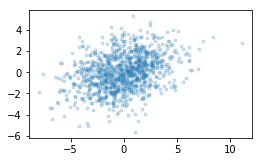

In [10]:
# Plot the data in 2D
subplot(111, aspect='equal')
plot(Y[0,:], Y[2,:], '.', alpha=0.2);

In [11]:
from sklearn import decomposition

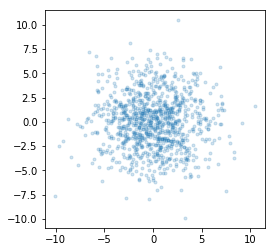

In [12]:
# Choose first k PCs by setting [n_componts] = k, if whiten the data then set [whiten] = True
pca = decomposition.PCA(n_components=Y.shape[0], whiten=False)
B = pca.fit_transform(Y.T).T
E, L = pca.components_.T, pca.explained_variance_

# Plot first 2 PCs
subplot(111, aspect='equal')
plot(B[0,:], B[1,:], '.', alpha=0.2);

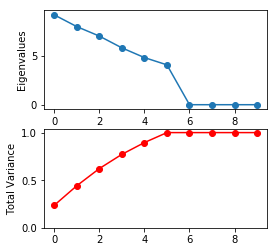

In [13]:
# Plot the eigenvalues
subplot(211); 
plot(L,'o-'); 
ylabel('Eigenvalues');

# Plot cumsum(Lambda) / sum(Lambda), i.e. how much variance are explained by first k PCs
subplot(212); 
cl = np.cumsum(L); 
ylabel('Total Variance');
plot(cl/cl[-1], 'o-r'); 
ylim(0, None);

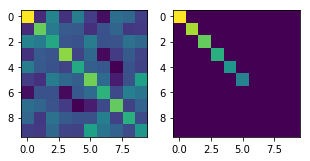

In [14]:
# Plot original and new covariance matrices (estimate w/o norm)
figure(figsize=(5,2.5))

# Original covariance matrix
subplot(121); 
imshow(Y.dot(Y.T), interpolation='none');

# New covariance matrix
subplot(122); 
imshow(B.dot(B.T), interpolation='none');

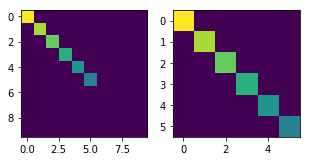

In [15]:
# First 6 PCs
A = B[:6,:]
figure(figsize=(5,2.5))

# Covariance matrix with first 10 PCs
subplot(121); 
imshow(B.dot(B.T),interpolation='none');

# Covariace matrix with first 6 PCs
subplot(122); 
imshow(A.dot(A.T),interpolation='none');

### Inverse of the Covariance Matrix

- Appears in the multivariate normal distribution!

>$\displaystyle{\cal{}N}(x;\mu,C) \propto \exp\left[-\frac{1}{2}(x\!-\!\mu)^T\,C^{-1} (x\!-\!\mu)\right]$

- Inverse of the diagonal eigenvalue matrix

>$\displaystyle \Lambda^{-1} =  \left( \begin{array}{ccc}
\frac{1}{\lambda_1} &  & \cdots & 0\\
 & \frac{1}{\lambda_2} &   & \vdots\\
\vdots &  & \ddots &  \\
0 & \cdots &  & \frac{1}{\lambda_N} \\
\end{array} \right)$

- Inverse of the covariance matrix

>$\displaystyle C^{-1} = \left( E\ \Lambda E^T \right)^{-1} = \left( E^T \right)^{-1} \Lambda^{-1} E^{-1} = E\ \Lambda^{-1} E^T$
>
> Recall that $ \; \displaystyle E\ E^T = E^T \ E = I \; $, i.e. $ \; \displaystyle \left(E^T \right)^{-1} = E \; $ and $ \; \displaystyle E^{-1} = E^T \; $
>
> Also recall the [properties](https://en.wikipedia.org/wiki/Invertible_matrix#Other_properties) of a invertible matrix

- Also see pseudoinverse with small eigenvalues 

### Fitting Lines

- What if $x$ and $y$ are both noisy? 

> For example, $\big\{(x_i,y_i)\big\}$ measurements have the same uncertainties. 
> The relevant residuals are perpendicular to the line.
> Minimizing RMS of residuals is related to maximizing the sample variance along line!

- Sounds like the PCA problem?


### Fitting Planes

- Similarly, fitting a $K$-dimensional hyperplane in $N$ dimensions

> Minimizing sum of square lengths of the residual vectors
>
>$\displaystyle \ \ \ \ \ \min \sum_i r_i^2 \ \ \ \ \ $  where $\ \ \ r_i = x_i - (a\,a^T)x_i$, 

> yields 

>$\displaystyle \ \ \ \ \ \max \sum_i \left(a^Tx_i\right)^2 \ \ \ \ \ $ 
>
> cf. sample variance along $a$, if data already center

- Essentially same as the PCA problem!

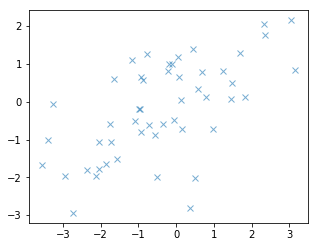

In [18]:
# Generate 2D (column) vectors
np.random.seed(seed=42);
N = gaussian.rvs(0,1,(2,50));

# Scale
N[0,:] *= 2 

# Rotate by 30 deg
f = +pi/6   
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(N)

# Plot
figure(figsize=(5,5)); 
subplot(111, aspect='equal');
plot(X[0,:], X[1,:],'x', alpha=0.6);

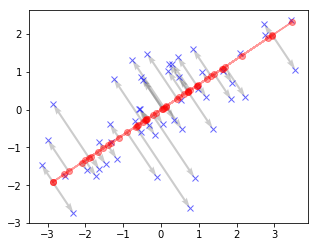

In [19]:
# Project on 1st pricipal component
X -= mean(X, axis=1).reshape(X[:,1].size,1)
E,_,_ = linalg.svd(X) # only keep eigenvectors
F = E[:,:1]           # truncated basis: only PC1
P = F.dot(F.T).dot(X) # projection
R = X - P             # residuals

# Plot
figure(figsize=(5,5)); 
subplot(111, aspect='equal');

# Original data
plot(X[0,:], X[1,:], 'xb', alpha=0.6);

# Projection
plot(P[0,:], P[1,:], '-or', alpha=0.4);

quiver(P[0,:], P[1,:], R[0,:], R[1,:], alpha=0.2, angles='xy', scale_units='xy', scale=1);

### More on Fitting Later

- Next: Bayesian inference
- ...